# Research Notebook
## Maximilian Heyne
## Date: Feb. 28 - March 17

# 1: Experience


- Clarifying the data from our simulations by binning the scatter plot points with error bars.

- Setting up Gadget-4 to reproduce data.

- Running more simulations that get snapshots down to a redshift of zero for more data.

- Making plots for the different redshift snapshots.


# Motivation


For me, the motivation in the last couple of weeks was to understand more about the effects that cause black hole growth in the early universe and also to be able to write a program that creates graphs that better express the results we got from our simulation. I also wanted to get more knowledge about the Gadget-4 code and reproduce some data with it. Therefore, I have been reading the documentation for Gadget-4 and also looking into a paper about black hole growth from D. M. Alexander and R. C. Hickox, 2024[1].

# 2: What? (What happened?)


To get the new graphs, the program had to undergo some changes to be able to bin the data and then plot them accordingly.
Binning data is used (in my case) to collect the data into a so-called bin. A bin merges the data points from a preset area into one point. I also implemented an error bar to describe the fluctuation of the data at this point. The bin size can be set to one's liking; I used 10 bins and a standard error for my plots.

The program has been updated with a function $bin_data$ that first filters for any values that are negative or zero. This is necessary because we want to apply logarithms to the values, and the logarithm is undefined for zero or negative values. If there is no data after the filtering, it ensures that empty bins are returned to avoid errors or wrong data.
Next, I created the logarithmic bins by using $np.logspace$ to scale between the minimum and maximum values of x for better handling of the data, so that smaller x-values get spaced more finely and larger ones more roughly.
Then, the $bin_center$ function calculates the center of each bin by taking the average of the edges of each consecutive pair of bins.
The binned values and errors are stored in two empty lists, $binned_y$ and $errors$.
Now, the program loops through each bin and creates a mask to select all data points of x that fall within the current bin range.
If there are data points in the current bin (in this case, $(np.sum(mask) > 0)$), it calculates the mean of the y-values that are in the bin using the $np.mean(y[mask])$ expression. It also calculates the standard error of the mean of the y-values by using the standard error, which takes the standard deviation $(np.std(y[mask]))$ and divides it by the square root of the number of points in the bin, represented by $(np.sum(mask))$.
For no data in the bin, it will append NaN (Not a Number) for each of the bins to indicate that no valid data was found.
In the end, the program returns the three arrays: $bin_center$ (which represents the center of each bin), $binned_y$ (the mean value of y within each bin), and $error$ (the standard error or uncertainty for each bin).




In [ ]:
# Binning function: returns the binned data and error (std dev)
def bin_data(x, y, num_bins=10):
    # Remove any zero or negative values before proceeding
    mask = (x > 0) & (y > 0)
    x = x[mask]
    y = y[mask]
    
    if len(x) == 0:  # If there's no data after filtering, return empty bins
        return [], [], []

    # Create bins for x using a logarithmic scale
    bin_edges = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), num_bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    # Initialize the arrays to hold binned values and errors
    binned_y = []
    errors = []
    
    # Loop through each bin
    for i in range(num_bins - 1):
        # Mask the data for the current bin
        mask = (x >= bin_edges[i]) & (x < bin_edges[i+1])
        if np.sum(mask) > 0:
            # Compute the mean and standard deviation of y in this bin
            binned_y.append(np.mean(y[mask]))
            errors.append(np.std(y[mask]) / np.sqrt(np.sum(mask)))  # Error as standard error
        else:
            binned_y.append(np.nan)
            errors.append(np.nan)
    
    return bin_centers, np.array(binned_y), np.array(errors)

# Black Hole Radiative Efficiency


The Radiative Efficiency of a Black Hole broadly describes how much energy a black hole can convert into radiation. This takes place during the accretion process in the accretion disk.
When the material falls toward the black hole, it heats up due to friction and gravitational forces. This causes the emission of radiation in different wavelengths like x-rays or black body radiation.
The radiative efficiency now gives a measure of how much energy of the infalling matter is lost by radiation and how much is accreted into the black hole.
Now, depending on whether a black hole has high or low efficiency, this also affects its growth.
If the radiative efficiency is high, more energy is lost by radiation and cannot fall into the black hole; vice versa, if the radiative efficiency is low, less energy is radiated away and the black hole should grow larger.
The radiative efficiency is also dependent on the spin of the black hole; usually, black holes with a higher spin have higher efficiency.

Therefore, we lowered the values for the radiative efficiency in our simulation from 0.2 (default) to 0.1, 0.05, and 0.01 to see if the black hole mass would increase.

In general, the accretion process of black holes is very complex, which is why I only broadly talked about Radiative Efficiency, how it works, and how it affects black hole growth.

# 3: So what? (What does it mean?)

With the updated program, we were able to create plots that show much better results. We found that we do get higher black hole mass and higher stellar mass when we change the parameters for Wind Velocity, Eddington Limit, Wind Energy, and Black Hole Radiative Efficiency.

Starting with z = 6 and going down to z = 0 for black hole mass and halo mass.
The parameters that were used are:

   - Default: Wind Energy 3.6, Eddington Limit 1, Wind Velocity 350, Radiative Efficiency 0.2

   - Other simulations: Wind Energy 0.2, Eddington Limit 5, Wind Velocity 50, and then Radiative Efficiency 0.2, 0.1, 0.05, and 0.01


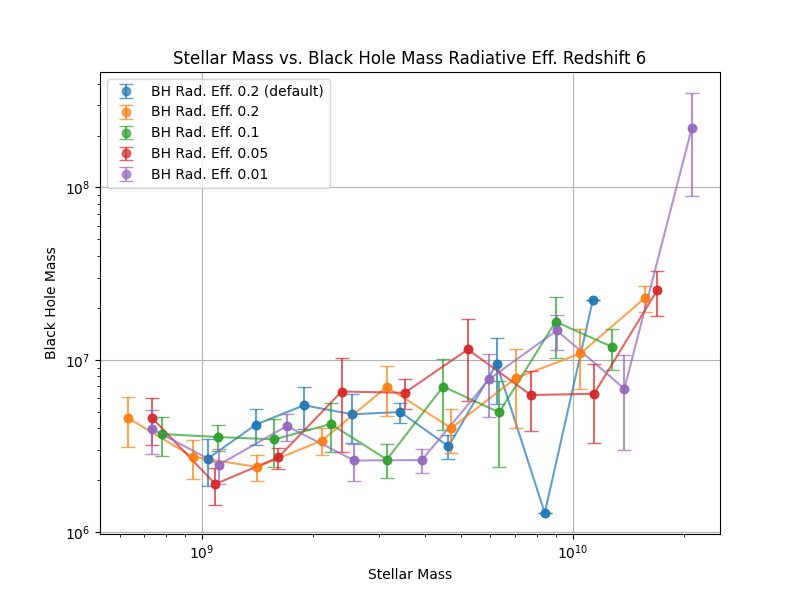
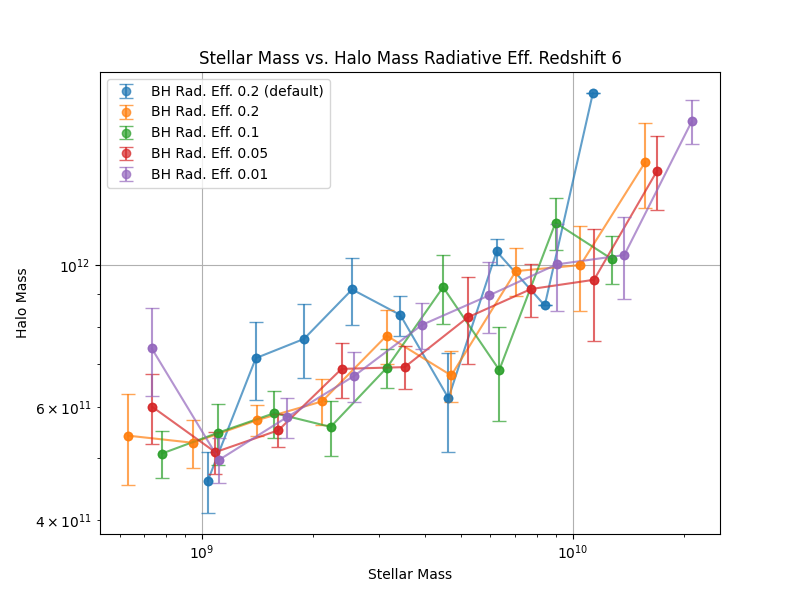


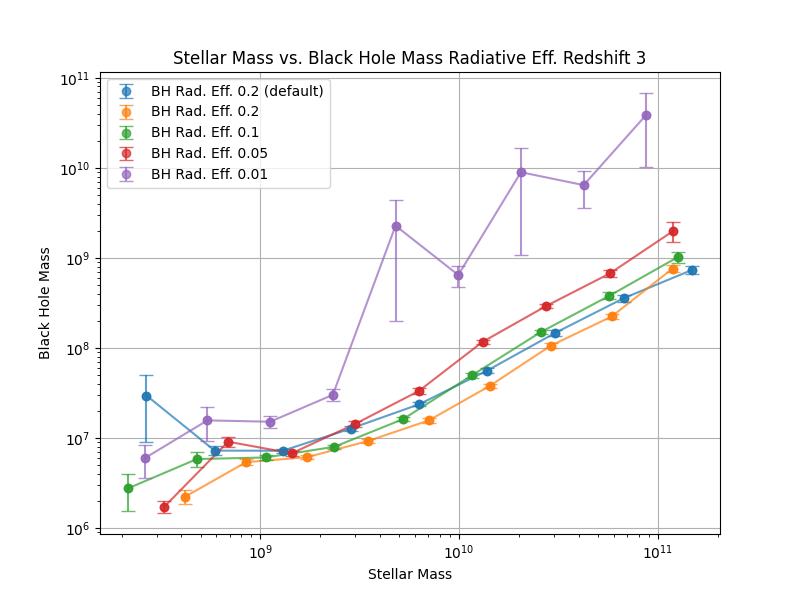
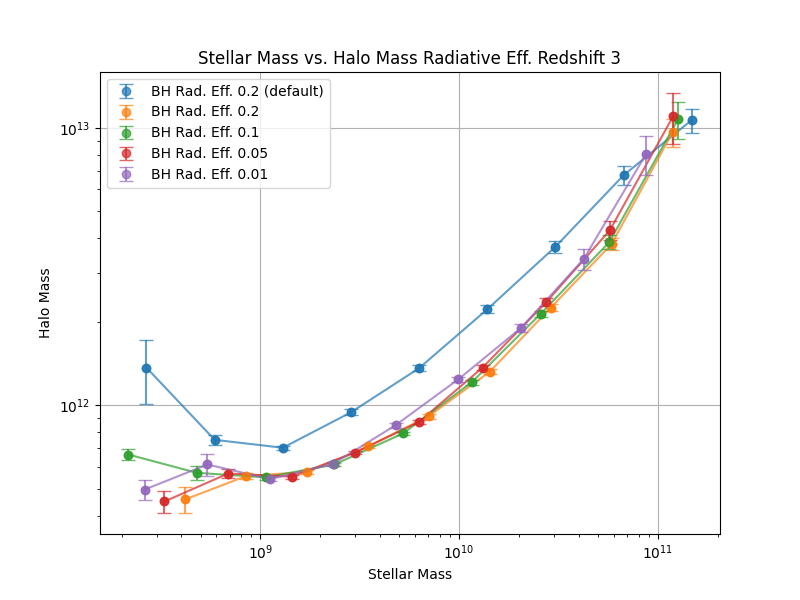


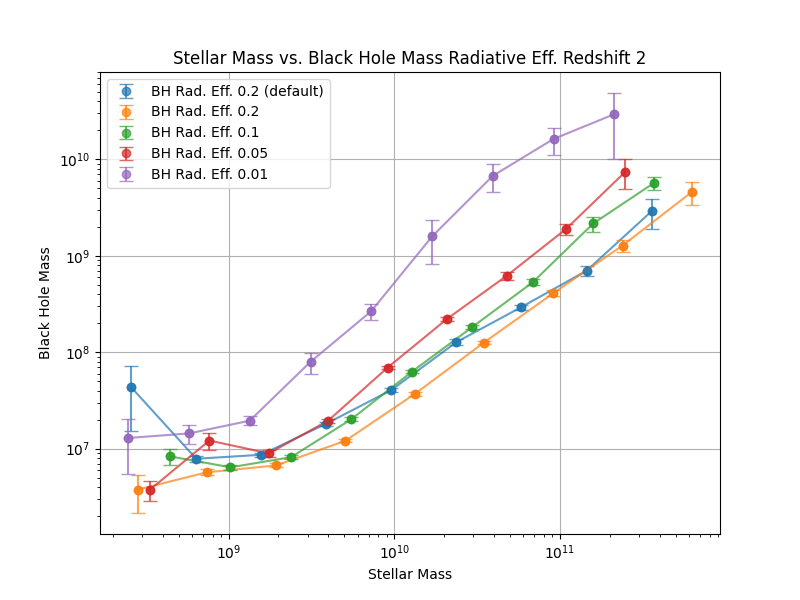
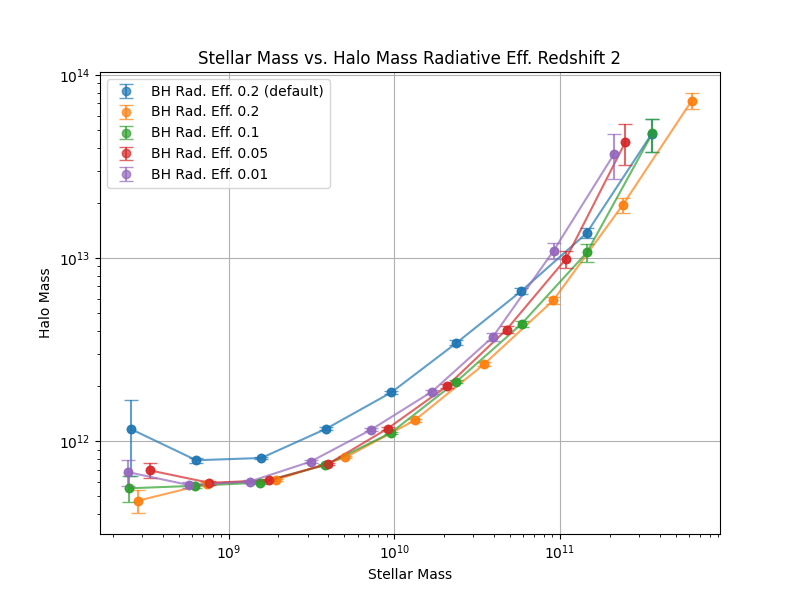

 
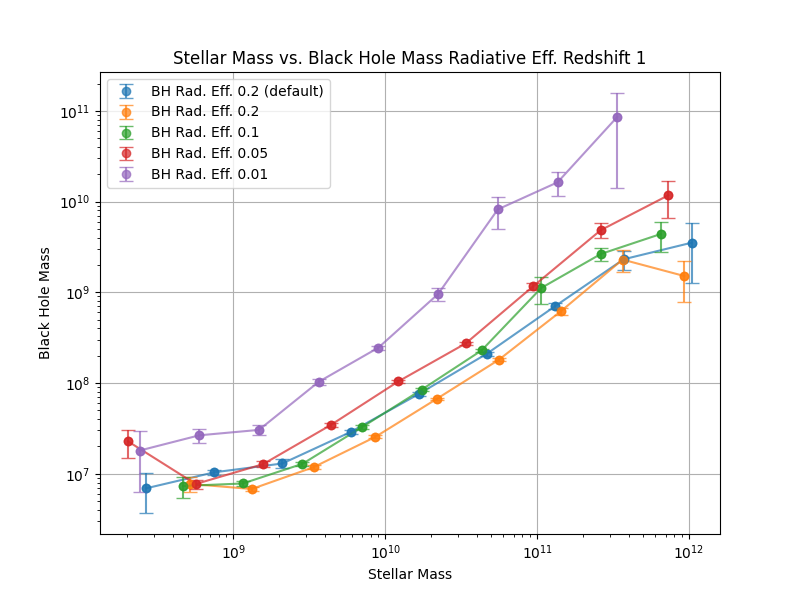 
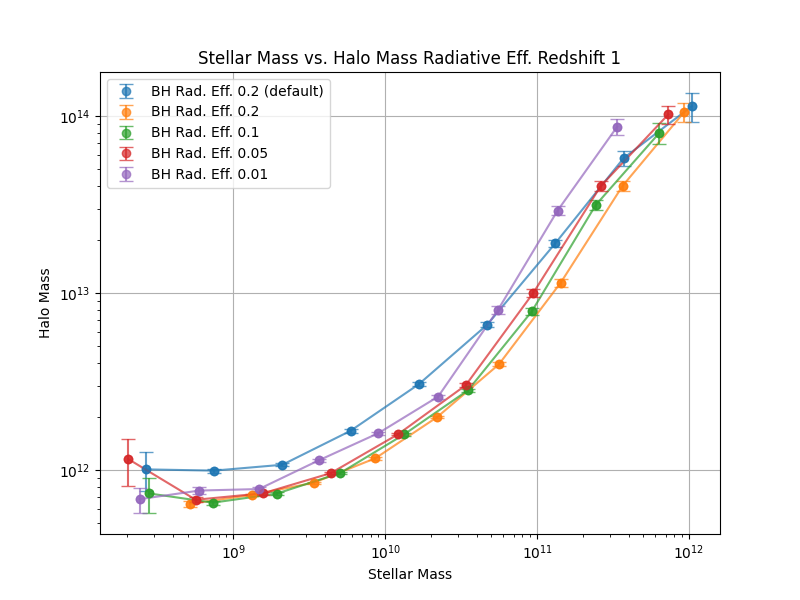


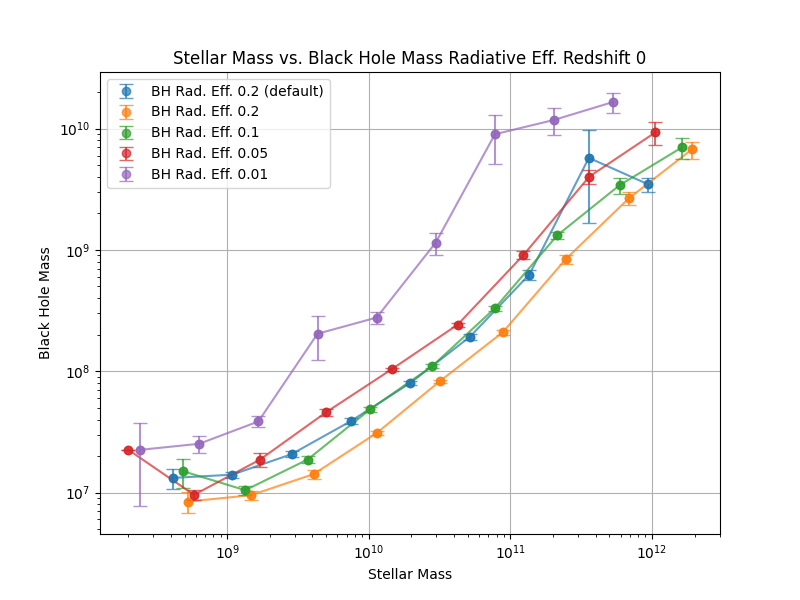
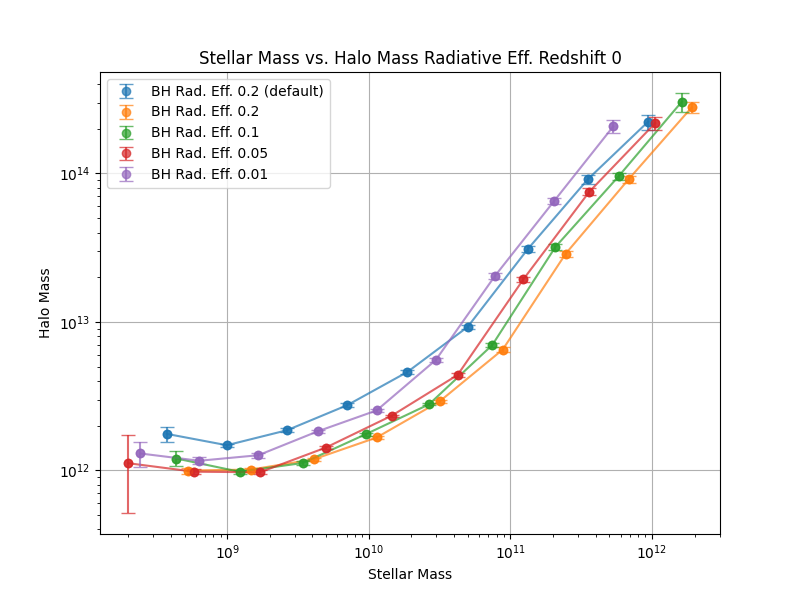
 
 


From the images, we can see an increased black hole mass, which is great news!
That shows that the parameters we changed have an impact on black hole growth as we were expecting.
Now we have to figure out how each value corresponds to the change in black hole growth and also compare it to observational data.
This will be the task for the coming weeks so we can present the full picture of our research at the end.

Gadget-4 is still having trouble compiling and getting it to work properly; this will also be a task for the upcoming weeks.

# 4. Now what? (What's next?)


For the upcoming weeks, we have quite a few things to do:

- Include observational data from a paper [2] from JWST into the above shown graphs for redshifts 3, 2, and 1.

- Include simulation data from another paper [3] into the above shown graphs for redshift z < 6 down to 0.

- Run a simulation down to redshift 0 with default parameters besides a change in the Eddington limit of 2, 3, 4, and 5, and add the above observational data and simulation data from the papers.

- Run a simulation down to redshift 0 with default parameters besides a change in the Radiative Efficiency of 0.2, 0.1, 0.05, and 0.01, and add the above observational data and simulation data from the papers.

- Run a simulation down to redshift 0 with default parameters besides a change in the stellar feedback (Wind Energy) of 2, 1, 0.5, and 0.2, and add the above observational data and simulation data from the papers.

- Get Gadget-4 to work properly. 


# 5. Bibliography


[1] https://arxiv.org/pdf/1112.1949
[2] https://arxiv.org/pdf/2404.05793
[3] https://arxiv.org/pdf/1806.07893